### A Deep Neural Network From Scratch Using Python

### Part I 
#### A Shallow Neural Network with One Hidden Layer
    

Our human brain consists of 100 billion neurons connected together, if these neurons got sufficient inputs are given to any individual neuron it will fire the next neuron. The same can be modeled and we can create a neural network where each node is similar to the neurons. We can assign weights and bias at each neurons and layers so that the signals can progress through the layers which is known as forward propagation. Then at the final layer we calculate the loss with respect to the expected label and pass the error backward to different nodes to penalise the weights and other parameters, this process is known as backward propagation. Then we will keep iterating this process to change the weights of different layers until convergence.

Following are the formulations and assumptions we made -

* Input X will be a matrix of size (No Of Attributes, No of examples)
* Output Y will be a matrix of size (1, No of Examples) - as we are only supporting one output node 
* We are constructing a single hidden layer shallow neural network  

* For the final layer we are using signoid function to get the softmax value  

* We are using **tanh** as the activation function for the hidden layer -

$$ g(z) = tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} \tag{1} $$

    -  So through calculas we can show the derivative of tanh as -

$$ {g}'(z) = 1 - {tanh(z)}^2 = 1 - {g(z)}^2 \tag{2} $$


* The **cost function** can be calculated from the following formula - 

$$ -\frac{1}{m} \sum\limits_{i = 1}^{m}(y^{(i)}\log\left(a^{(i)}\right) + (1-y^{(i)})\log\left(1- a^{(i)}\right)) \tag{3} $$

* So the formulas for **forward propagation** will looks like considering X as input and Y as output -  


    - Hidden Layer Input ->
$$  Z^{(1)} = W^{(1)}X + b^{(1)} \tag{4} $$

    - Hidden Layer OutPut through Activation(tanh) function ->
$$  A^{(1)} = g^{(1)}(Z^{(1)}) = tanh(Z^{(1)}) \tag{5} $$

    - Final Layer Input ->
$$  Z^{(2)} = W^{(2)}A^{(1)} + b^{(2)} \tag{6} $$

    - Final Layer Output through Sigmoid ->
$$  Y = A^{(2)} = g^{(2)}(Z^{(2)}) = sigmoid(Z^{(2)}) \tag{7} $$


* So the formulas for **back propagation** will looks like considering X as input and Y as output -


    - differential For Final Layer -> 
$$  dZ^{(2)} = A^{(2)} - Y \tag{8} $$

    - weight differentials for Final Layer -> 
$$  dW^{(2)} = dZ^{(2)} (A^{(1)})^{T} \tag{9} $$

    - bias differentials for final layer -> 
$$ db^{(2)} = dZ^{(2)} \tag{10} $$

    - differentials for hidden layer output -> 
$$ dZ^{(1)} = (W^{(2)})^{(T)}dZ^{(2)} * {g^{(1)}}'(Z^{(1)}) \tag{11}  $$ 

    - so from the formula (2) we can write 
$$ dZ^{(1)} = (W^{(2)})^{(T)}dZ^{(2)} * (1 - (g^{(1)}(Z))^{2}) = (W^{(2)})^{(T)}dZ^{(2)} * (1 - (A^{(1)})^{2}) \tag{12} $$

    - weight differentials for Hidden Layer ->
$$ dW^{(1)} = dZ^{(1)} (X^{(1)})^{T} \tag{13} $$

    - bias differentials for Hidden layer -> 
$$ db^{(1)} = dZ^{(1)} \tag{14} $$

#### Implementation: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import time
import pandas as pd

In [2]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def initialize_parameters(nx, nh, ny):

    # Initialise the parameters with random value 
    # W1 -> (hiddenLayerSize, Input Attribute Count)
    # b1 -> (hiddenLayerSize,1)
    # W2 -> (OutPutLayerSize, HiddenLayerSize)
    # b2 -> (OutPutLayerSize, 1)

    # Initialise with random values for Weight
    # Initialise with zeros for bias
    W1 = np.random.randn(nh, nx) * 0.01
    b1 = np.zeros(shape=(nh, 1))
    W2 = np.random.randn(ny, nh) * 0.01
    b2 = np.zeros(shape=(ny, 1))
    
    # Create a dictionary for parameters
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


def forward_propagation(X, parameters):
    # Input Param : Weight, Bias and Input X
    # All the equations from (4) to (7) shown above has been implemented
    
    # Get each Parametrs from Param
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Calculate Z1
    Z1 = np.dot(W1, X) + b1
    # Calculate Activation 1 with tanh
    A1 = np.tanh(Z1)
    # Calculate Z2
    Z2 = np.dot(W2, A1) + b2
    # Calculate Z2 with Sigmoid as this is the output layer
    A2 = sigmoid(Z2)
    
    # Return Dictionary containing the Z and A values 
    # as it will be needed during back Propagation Calculation
    forwards = {"Z1": Z1,
                "A1": A1,
                "Z2": Z2,
                "A2": A2}
    
    return forwards

def compute_cost(A2, Y):
    
    # Calculate the No Of Examples from the Actual Output  , params
    m = Y.shape[1] # number of example
    
    # Get the cross Entropy to calculate the cost
    # Formula 3 has been implemented here
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m

    # Change the dimension of cost to a single value from matrix
    cost = np.squeeze(cost)     

    return cost

def back_propagation(params, forwards, X, Y):
   
    # Get the shape of the data
    m = X.shape[1]
    
    # Get W1, W2, A1, A2 from params and forwards
    W1 = params['W1']
    W2 = params['W2']
    A1 = forwards['A1']
    A2 = forwards['A2']
    
    # Back Prop Calculation 
    # Calculate the Updated Gradients
    # Formulas from (8) to (14)
    dZ2= A2 - Y 
    dW2 = (1 / m) * np.dot(dZ2, np.transpose(A1))
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(np.transpose(W2), dZ2), 1 - np.power(A1, 2)) # From Equation 12
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X))
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
    
    return gradients


def update_parameters(parameters, grads, alpha=0.0075):
    
    # Update Parameters with Learning Rate
    # alpha - learning rate
    
    # Get W1,b1,W2,b2 from parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # get dW1, dW2, db1,db2 from grads
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Calculate Updated Parameters with Gradient and Learning Rate
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def model_1layer(X, Y, h, epochs=10000, alpha = 0.0075):
    
    nx = X.shape[0] # size of input layer
    nh = h # Size of the hidden layer
    ny = Y.shape[0] # size of output layer
    
    # Initialize parameters
    parameters = initialize_parameters(nx, h, ny)
    
    # Get W1,b1,W2,b2 from parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    costs = [] # Save Cost at every epoch
    
    # Implement Gradient Descent with iterations

    for i in range(0, epochs):
         
        # Forward Propagation
        forwards = forward_propagation(X, parameters)
        A2 = forwards['A2']
        
        # Compute Cost
        cost = compute_cost(A2, Y)
 
        # Backpropagation to calculate the Gradients
        grads = back_propagation(parameters, forwards, X, Y)
 
        # Update the parameters
        parameters = update_parameters(parameters, grads, alpha)
        
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print ("Cost after %i epoch: %f" % (i, cost))
        
        costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Trend in Costs")
    plt.show()

    return parameters

def predict(parameters, X):
    
    # Predict with forward propagation
    forwards = forward_propagation(X, parameters)
    A2 = forwards['A2']
    predictions = np.round(A2)
    
    return predictions


### Part II
#### Data Preparation & Testing On a Simple Data Set 
#### The data can be classified with a simple non Linear Boundary

#### Prepare the data

In [3]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
Y = df['Class'].values

# The x values are all other columns
del df['Class']    # drop the 'Class' column from the dataframe

X = df.values

In [4]:
print(X.shape)
print(Y.shape)
Y = Y.reshape(500,1)
print(Y.shape)

(500, 2)
(500,)
(500, 1)


In [5]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [6]:
# Transpose to get in required form 
X_train =np.transpose(X_train)
y_train = y_train.reshape(len(y_train),1)
y_train =np.transpose(y_train)


X_test =np.transpose(X_test)
y_test = y_test.reshape(len(y_test),1)
y_test = np.transpose(y_test)

print(X_train.shape)
print(y_train.shape)

(2, 335)
(1, 335)


#### Train the Model
    - Hidden Layer - 1 with 4 neurons
    - Epoch 10k
    - Learning Rate 1.2

Cost after 0 epoch: 0.693143
Cost after 1000 epoch: 0.054947
Cost after 2000 epoch: 0.028863
Cost after 3000 epoch: 0.020511
Cost after 4000 epoch: 0.016280
Cost after 5000 epoch: 0.013671
Cost after 6000 epoch: 0.011878
Cost after 7000 epoch: 0.010556
Cost after 8000 epoch: 0.009536
Cost after 9000 epoch: 0.008720


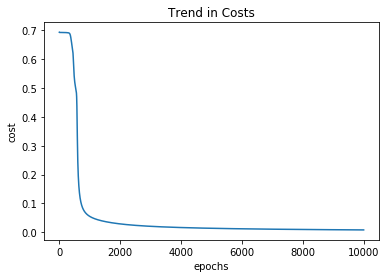

Total Runtime:  1716.3623046875  ms


In [7]:
t1 = time.time() * 1000
parameters = model_1layer(X_train, y_train, h=4, epochs=10000, alpha = 1.2)
t2 = time.time() * 1000
print("Total Runtime: ",t2-t1," ms")

#### Predict

In [8]:
# Predict 
predictions = predict(parameters, X_test)

In [9]:
# Prepare to get the perfomance metrices
actual = y_test.flatten()
predicted = predictions.flatten()

#### Confusion Materix

In [10]:
import pandas as pd
y_true = pd.Series(actual)
y_pred = pd.Series(predicted)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,76,0,76
1,0,89,89
All,76,89,165


#### Classification Report

In [11]:
print(classification_report(actual, predicted, target_names=['ClassNegetive', 'ClassPositive']))

               precision    recall  f1-score   support

ClassNegetive       1.00      1.00      1.00        76
ClassPositive       1.00      1.00      1.00        89

  avg / total       1.00      1.00      1.00       165



#### Accuracy 

In [12]:
accuracy_score(actual,predicted)

1.0

#### Observations 
* We have seen the models separates the non linear boundary perfectly 
* It gives 100 % Accuracy and the training of the data also tooks around 2 second

### Part III
#### Data Preparation and Testing on a complex data

#### Prepare the data

In [13]:
# This function taken from the CIFAR website

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch


def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [14]:
# Load the batch
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

# Extract Data
data = batch1[b'data']
# Extract Labels
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print("Shape of the data: " ,data.shape)
print(loadlabelnames())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
size of data in this batch: 10000 , size of labels: 10000
Shape of the data:  (10000, 3072)
[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


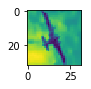

In [15]:
# Extract Labels
lab = np.array(labels)
# Reshape Label Matrix
lab = lab.reshape(10000,1)
# Append Data with Label
data_with_label = np.append(data, lab, axis=1)
d = data_with_label
# Take the data only belongs to Aeroplane and Bird
d = d[np.logical_or(d[:,3072] == 0, d[:,3072] == 2 )]

# Draw a sample in Red Scale
pic1 = d[58,0:1024].astype(np.uint8)
pic1.shape = (32,32)
plt.figure(figsize=(1,1))
plt.imshow(pic1)
plt.show()

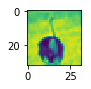

In [16]:
# Draw a sample in Red Scale
pic1 = d[55,0:1024].astype(np.uint8)
pic1.shape = (32,32)
plt.figure(figsize=(1,1))
plt.imshow(pic1)
plt.show()

* Here we are only taking the red band
* We are also normalizing the data before processing

In [17]:
# Take the first 1024 (Red Band Data)
X = d[:,0:1024]
# Take the Corresponding Label
Y = d[:,3072:3073]

# Modify the label as 1 for Bird as it has 2 as label by default
Y[Y==2] = 1

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

# Transpose the data to make it in input format
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)
y_train = np.transpose(y_train)
y_test = np.transpose(y_test)

# Normalise the data 
X_train = X_train/255
X_test = X_test/255

# Check the Shape 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1024, 1364)
(1, 1364)
(1024, 673)
(1, 673)


#### Train the Model
    - Hidden Layer 1 with 50 neurons
    - Epochs 20k

Cost after 0 epoch: 0.693615
Cost after 1000 epoch: 0.685807
Cost after 2000 epoch: 0.674104
Cost after 3000 epoch: 0.664646
Cost after 4000 epoch: 0.651792
Cost after 5000 epoch: 0.634573
Cost after 6000 epoch: 0.615169
Cost after 7000 epoch: 0.595187
Cost after 8000 epoch: 0.574745
Cost after 9000 epoch: 0.554152
Cost after 10000 epoch: 0.533218
Cost after 11000 epoch: 0.511133
Cost after 12000 epoch: 0.486636
Cost after 13000 epoch: 0.460727
Cost after 14000 epoch: 0.435178
Cost after 15000 epoch: 0.425026
Cost after 16000 epoch: 0.405643
Cost after 17000 epoch: 0.387806
Cost after 18000 epoch: 0.370778
Cost after 19000 epoch: 0.354141


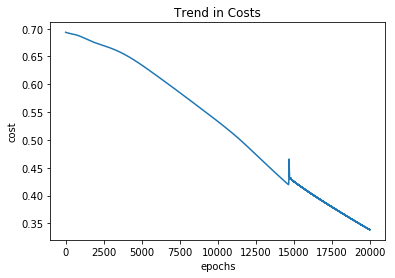

Total Runtime:  194964.75366210938  ms


In [18]:
t1 = time.time() * 1000
# Train the model
parameters = model_1layer(X_train, y_train, h = 50, epochs=20000, alpha = 0.0075)
t2 = time.time() * 1000
print("Total Runtime: ",t2-t1," ms")

#### Predict

In [19]:
# Predict 
predictions = predict(parameters, X_test)

In [20]:
# Prepare to get the perfomance metrices
actual = y_test.flatten()
predicted = predictions.flatten()

#### Confusion Materix

In [21]:
import pandas as pd
y_true = pd.Series(actual)
y_pred = pd.Series(predicted)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,174,147,321
1,92,260,352
All,266,407,673


#### Classification Report

In [22]:
print(classification_report(actual, predicted, target_names=['ClassNegetive', 'ClassPositive']))

               precision    recall  f1-score   support

ClassNegetive       0.65      0.54      0.59       321
ClassPositive       0.64      0.74      0.69       352

  avg / total       0.65      0.64      0.64       673



#### Accuracy 

In [23]:
accuracy_score(actual,predicted)

0.6448736998514116

#### Observations:
* We have found in the larger complex dataset the single layer neural network not perform well and gives an accuracy of 65%
* Though tuning the hyperparametrs may improve the performance as we have seen the cost is still converging after 20k epoch

### Part IV

#### Adding a Deep Layer (additional hidden layer)

#### Enhancement 

* I have changed the activation function from tanh to ReLU as ReLU is computationally less expensive and works much faster than tanh
* I have also added an additional hidden layer to the network to make the model as deep neural network
* While initializing the weight I have normalised them with respect to the previous layer weight
* Using ReLU and the normalization during weight initialization will reduce the chance of getting into the vanishing or exploding gradient issue
* Implementation of forward and back propagation will remain same from part I, only the tanh activation function is replaced by ReLU 
* As I have used RELU following is the implementation of RELU
$$ ReLU(x)=max(0,x)  $$
* Implementation of derivative of ReLU Function 
$$ {f}'(ReLU(x)) =\left\{\begin{array}{ll}1  & \mbox{if } x >  0 \\0 & \mbox{if } x \leqslant  0\end{array}\right.$$ 


* So during back propagation I have passed the activation output when x is greater than zero

#### Implementation

In [24]:
# relu implementation
def relu(x):
    s = np.maximum(0,x)
    return s

# Dynamically Initialise the parameters
def initialize_parameters_3layer(layers):
    
    # size of each layer including input and output 
    # as an array

    parameters = {}
    L = len(layers) 
    
    for i in range(L-1):
        # Update weight with weight Normalization
        parameters["W" + str(i+1)] = np.random.randn(layers[i+1], layers[i]) / np.sqrt(layers[i])
        parameters["b" + str(i+1)] = np.zeros((layers[i+1], 1));

    return parameters


def forward_propagation_3layer(X, parameters):

    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # layer 1
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    # Layer 2
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    # Layer 3
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Required For Back Propagation
    forward = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return forward

def back_propagation_3layer(X, Y, forward):

    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = forward

    m = X.shape[1]
    
    # Layer 3
    dZ3 = 1./m * (A3 - Y) 
    dW3 = np.dot(dZ3, A2.T)
    db3 = np.sum(dZ3, axis=1, keepdims = True)

    # Layer 2
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0)) # considering the derivative of relu
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims = True)

    # Layer 1
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0)) # considering the derivative of relu
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dW3": dW3, "db3": db3,
                 "dW2": dW2, "db2": db2,
                 "dW1": dW1, "db1": db1}

    return gradients

# Dynamically update the parameters
def update_parameters_3layer(parameters, grads, alpha):

    # Number of layers
    L = len(parameters) // 2 

    # Update Parameters
    for i in range(L):
        parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - alpha * grads["dW" + str(i+1)]
        parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - alpha * grads["db" + str(i+1)]

    return parameters




In [25]:
def model_3layer(X, Y, alpha = 0.01, epochs = 10000, h1=10, h2=5):
   
    grads = {}
    costs = [] # to keep track of the loss

    layers = [X.shape[0], h1, h2, 1]

    # Initialize parameters dictionary.
    parameters = initialize_parameters_3layer(layers)

    # Loop (gradient descent)

    for i in range(epochs):

        # Forward propagation
        forward = forward_propagation_3layer(X, parameters)
        
        (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = forward
        
        # Loss
        cost = compute_cost(A3, Y)

        # Backward propagation.
        gradients = back_propagation_3layer(X, Y, forward)

        # Update parameters.
        parameters = update_parameters_3layer(parameters, gradients, alpha)

        # Print loss every 1000 epochs
        if i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs(1000s)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return parameters

In [26]:
def predict_3layer(parameters, X):
    
    # Predict with forward propagation
    forwards = forward_propagation_3layer(X, parameters)
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = forwards
    predictions = np.round(A3)
    
    return predictions

#### Data Preparation
* This time I am using all the 3 bands simultaneously as I have found its giving high performance than a single colort channel 

In [27]:
# Take all the three band data
X1 = d[:,0:3072]
# Take the Corresponding Label
Y1 = d[:,3072:3073]

# Modify the label as 1 for Bird as it has 2 as label by default
Y1[Y1==2] = 1

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, Y1, test_size=0.33, random_state=42)

# Transpose the data to make it in input format
X_train1 = np.transpose(X_train1)
X_test1 = np.transpose(X_test1)
y_train1 = np.transpose(y_train1)
y_test1 = np.transpose(y_test1)

# Normalise the data 
X_train1 = X_train1/255
X_test1 = X_test1/255

# Check the Shape 
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)


(3072, 1364)
(1, 1364)
(3072, 673)
(1, 673)


#### Training the Model

Cost after iteration 0: 0.7056814849641672
Cost after iteration 1000: 0.41652622344757906
Cost after iteration 2000: 0.37031977251076903
Cost after iteration 3000: 0.3107490649563497
Cost after iteration 4000: 0.26473054382449795
Cost after iteration 5000: 0.20127408863086554
Cost after iteration 6000: 0.14119055283716955
Cost after iteration 7000: 0.08767330487716246
Cost after iteration 8000: 0.056395417067034624
Cost after iteration 9000: 0.04142099729807579
Cost after iteration 10000: 0.031340982354254296
Cost after iteration 11000: 0.02381962446376794


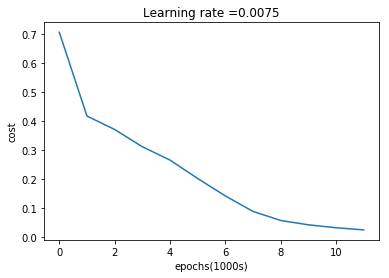

Total Runtime:  479240.9626464844  ms


In [29]:
t1 = time.time() * 1000
parameters_3l = model_3layer(X_train1, y_train1, alpha = 0.0075, epochs = 12000, 
                   h1=124,h2=10)
t2 = time.time() * 1000
print("Total Runtime: ",t2-t1," ms")

#### Predict

In [30]:
# Predict 
predictions_3l = predict_3layer(parameters_3l, X_test1)

In [31]:
# Prepare to get the perfomance metrices
actual_3l = y_test1.flatten()
predicted_3l = predictions_3l.flatten()

#### Confusion Materix

In [32]:
y_true = pd.Series(actual_3l)
y_pred = pd.Series(predicted_3l)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,257,64,321
1,59,293,352
All,316,357,673


#### Classification Report

In [33]:
print(classification_report(actual_3l, predicted_3l, target_names=['ClassNegetive', 'ClassPositive']))

               precision    recall  f1-score   support

ClassNegetive       0.81      0.80      0.81       321
ClassPositive       0.82      0.83      0.83       352

  avg / total       0.82      0.82      0.82       673



#### Accuracy 

In [34]:
accuracy_score(actual_3l,predicted_3l)

0.8172362555720654

#### Observations:
* We have found that after increasing the number of hidden layer from one to two and using ReLU as the activation function the performance and accuracy has increased significantly
* So as a further improement scope we can make this implemenation dynamic and increase the hidden layer further which can improve the accuracy


### References

* One Hidden Layer Neural Network. (n.d.). Retrieved from https://cs230.stanford.edu/files/C1M3.pdf
* Deep Neural Networks. (n.d.). Retrieved from http://cs230.stanford.edu/files/C1M4.pdf
* Neural Networks and Deep Learning. (n.d.). Retrieved from https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome
* User3378649user3378649 4373721, Achennuachennu 53145, AkavallAkavall 1, & PranzellPranzell 1112. (n.d.). How can I interpret Sklearn confusion matrix. Retrieved from https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix